<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/FuzzyLogic/FuzzyLogic_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update && apt-get upgrade -y
!pip install matplotlib scikit-fuzzy

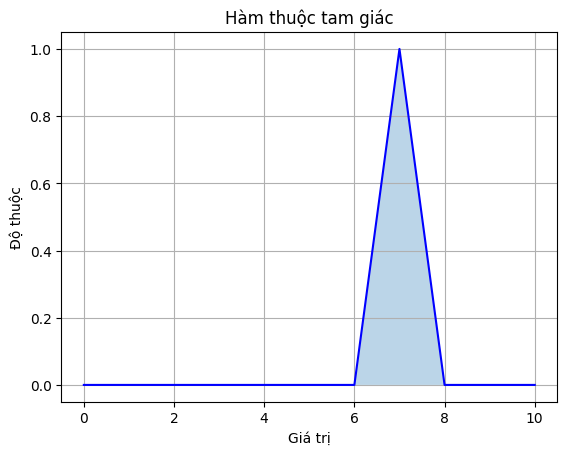

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Định nghĩa tập hợp và các giá trị
universe = np.arange(0, 11, 1)
a = 3
b = 7
c = 8

# TÍnh giá trị hàm thuộc
membership = np.zeros_like(universe)
membership[(universe >= a) & (universe <= b)] = (universe[(universe >= a) & (universe <= b)] - a) / (b - a)
membership[(universe >= b) & (universe <= c)] = (c - universe[(universe >= b) & (universe <= c)]) / (c - b)

# Vẽ đồ thị hàm thuộc tam giác
plt.plot(universe, membership, 'b', linewidth=1.5)
plt.fill_between(universe, 0, membership, alpha=0.3)
plt.title('Hàm thuộc tam giác')
plt.xlabel('Giá trị')
plt.ylabel('Độ thuộc')
plt.grid()
plt.show()


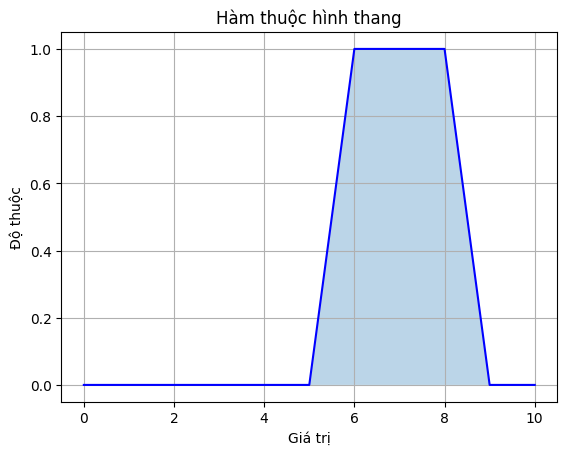

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Định nghĩa tập hợp và các giá trị
universe = np.arange(0, 11, 1)
a = 3
b = 6
c = 8
d = 9

# ĐÍnh giá tị hàm thuộc
membership = np.zeros_like(universe)
membership[(universe >= a) & (universe <= b)] = (universe[(universe >= a) & (universe <= b)] - a) / (b - a)
membership[(universe >= b) & (universe <= c)] = 1
membership[(universe >= c) & (universe <= d)] = (d - universe[(universe >= c) & (universe <= d)]) / (d - c)

# Vẽ đồ thị hàm thuộc hình thang
plt.plot(universe, membership, 'b', linewidth=1.5)
plt.fill_between(universe, 0, membership, alpha=0.3)
plt.title('Hàm thuộc hình thang')
plt.xlabel('Giá trị')
plt.ylabel('Độ thuộc')
plt.grid()
plt.show()

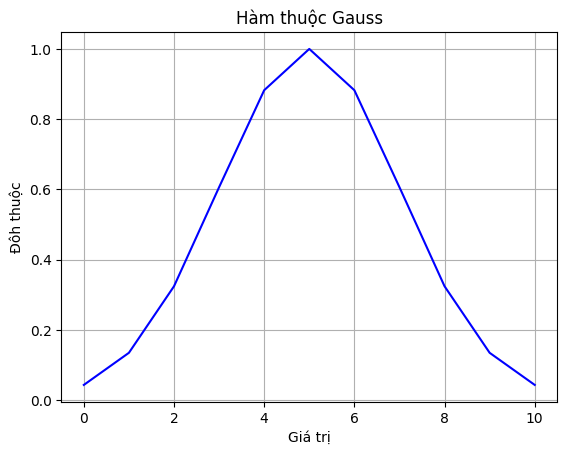

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Định nghĩa tập hợp và các giá trị
universe = np.arange(0, 11, 1)
mean = 5
std_dev = 2

# Tính giá trị hàm Gaussian
membership = np.exp(- ((universe - mean) ** 2) / (2 * std_dev ** 2))

# Vẽ đồ thị hàm Gauss
plt.plot(universe, membership, 'b', linewidth=1.5)
plt.title('Hàm thuộc Gauss')
plt.xlabel('Giá trị')
plt.ylabel('Đôh thuộc')
plt.grid()
plt.show()

Enter temp: 12
Enter humidity: 80
Command is defined between 15 y 25
21.567222957630463
=> Warm Up


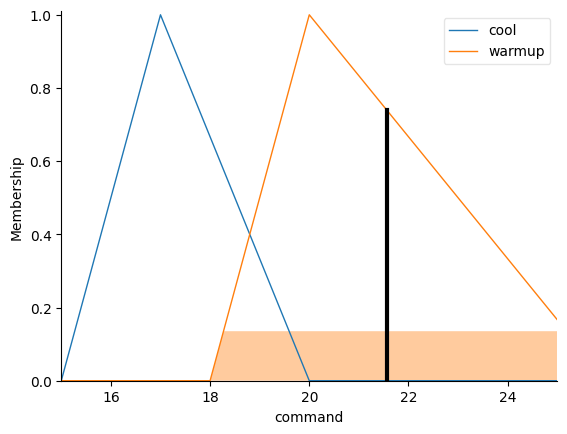

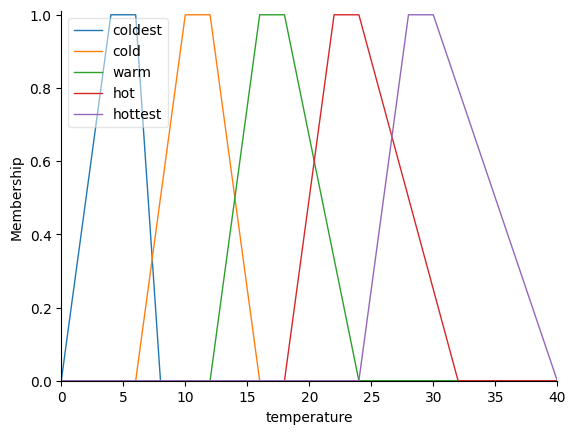

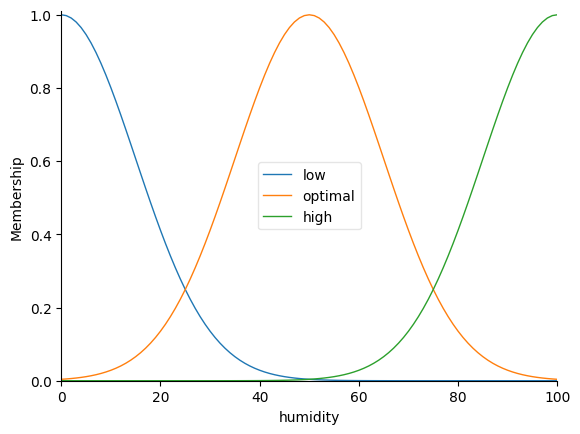

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedents
temp = ctrl.Antecedent(np.arange(0, 41), 'temperature')
hum = ctrl.Antecedent(np.arange(0, 101), 'humidity')

# Consequents
cmd = ctrl.Consequent(np.arange(15, 26), 'command')

# Temperature memberships
temp['coldest'] = fuzz.trapmf(temp.universe, [0, 4, 6, 8])
temp['cold'] = fuzz.trapmf(temp.universe, [6, 10, 12, 16])
temp['warm'] = fuzz.trapmf(temp.universe, [12, 16, 18, 24])
temp['hot'] = fuzz.trapmf(temp.universe, [18, 22, 24, 32])
temp['hottest'] = fuzz.trapmf(temp.universe, [24, 28, 30, 40])

# HUmidity memberships
hum['low'] = fuzz.gaussmf(hum.universe, 0, 15)
hum['optimal'] = fuzz.gaussmf(hum.universe, 50, 15)
hum['high'] = fuzz.gaussmf(hum.universe, 100, 15)

# Command memberships
cmd['cool'] = fuzz.trimf(cmd.universe, [15, 17, 20])
cmd['warmup'] = fuzz.trimf(cmd.universe, [18, 20, 26])

# Rule system
# Rules for warming up
rule1 = ctrl.Rule(
    temp['coldest'] & hum['low'] |
    temp['coldest'] & hum['optimal'] |
    temp['coldest'] & hum['high'] |
    temp['cold']  & hum['low'] |
    temp['cold'] & hum['optimal'] |
    temp['warm'] & hum['low'], cmd['warmup']
)

# Rules for colling up
rule2 = ctrl.Rule(
    temp['warm'] & hum['optimal'] |
    temp['warm'] & hum['high'] |
    temp['hot'] & hum['optimal'] |
    temp['hot'] & hum['high'] |
    temp['hottest'] & hum['low'] |
    temp['hottest'] & hum['optimal'] |
    temp['hottest'] & hum['high'], cmd['cool']
)

# Control system creation and simulation
cmd_ctrl = ctrl.ControlSystem([rule1, rule2])
cmd_output = ctrl.ControlSystemSimulation(cmd_ctrl)

# Enter vakues to test

temperature_value = float(input('Enter temp: '))

while temperature_value <= 0 or temperature_value > 40:
  try:
    temperature_value = float(input('Please choose a number between 0 - 40: '))
  except ValueError as ex:
    print('We except you to enter a valid int')

humidity_value = float(input('Enter humidity: '))

while humidity_value < 0 or humidity_value > 100:
  try:
    humidity_value = float(input('Please choose a number between 0 - 100: '))
  except ValueError as ex:
    print('We expect you to enter a valid int')

cmd_output.input['temperature'] = temperature_value
cmd_output.input['humidity'] = humidity_value
cmd_output.compute()

# Print output command and plots
print('Command is defined between 15 y 25')
print(cmd_output.output['command'])
if cmd_output.output['command'] > 20:
  print('=> Warm Up')
elif cmd_output.output['command'] < 20 and cmd_output.output['command'] > 18:
  print('=> No change')
else:
  print('=> Cool Up')

cmd.view(sim=cmd_output)
temp.view()
hum.view()

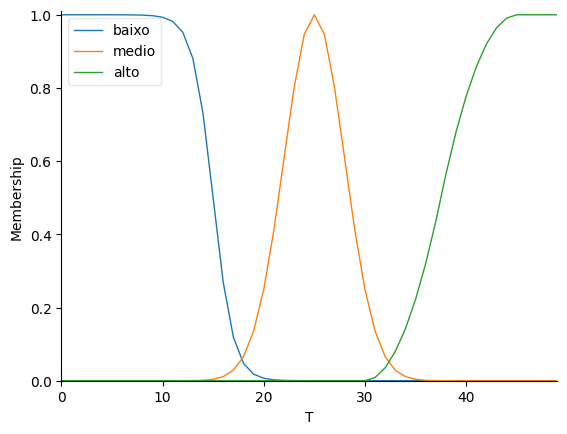

In [ ]:
t = ctrl.Antecedent(np.arange(0, 50, 1), 'T')
t['baixo'] = fuzz.sigmf(t.universe, 15, -1)
t['medio'] = fuzz.gaussmf(t.universe, 25, 3)
t['alto'] = fuzz.pimf(t.universe, 30, 45, 50, 75)
t.view()

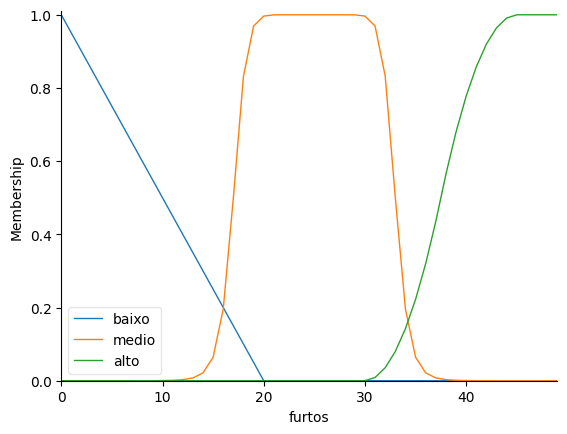

In [ ]:
fur = ctrl.Antecedent(np.arange(0, 50, 1), 'furtos')

fur['baixo'] = fuzz.trimf(fur.universe, [0, 0, 20])
fur['medio'] = fuzz.gbellmf(fur.universe, 8, 6, 25)
fur['alto'] = fuzz.pimf(fur.universe, 30, 45, 50, 75)

fur.view()

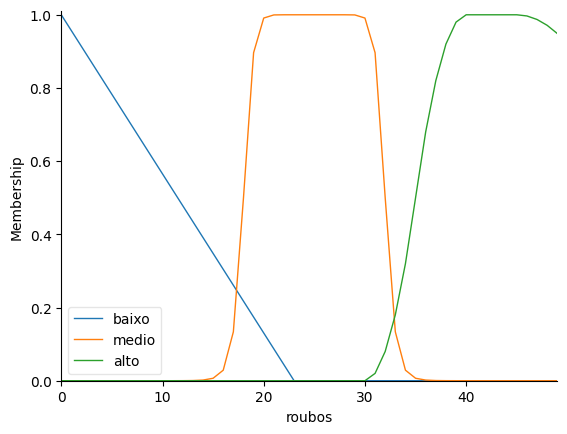

In [ ]:
rou = ctrl.Antecedent(np.arange(0, 50, 1), 'roubos')

rou['baixo'] = fuzz.trimf(rou.universe, [0, 0 ,23])
rou['medio'] = fuzz.gbellmf(rou.universe, 7, 7, 25)
rou['alto'] = fuzz.pimf(rou.universe, 30, 40, 45, 70)

rou.view()

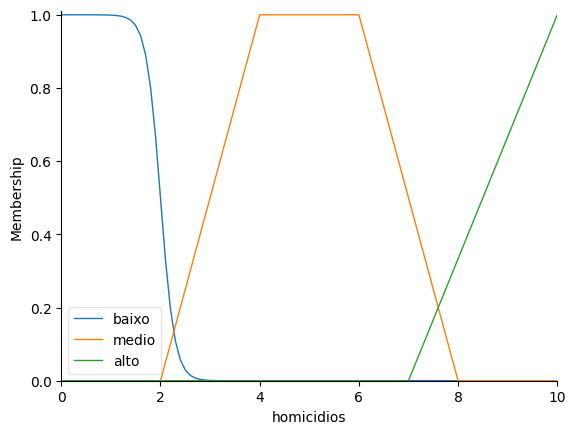

In [ ]:
hom = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'homicidios')

hom['baixo'] = fuzz.sigmf(hom.universe, 2, -7)
hom['medio'] = fuzz.trapmf(hom.universe, [2, 4, 6, 8])
hom['alto'] = fuzz.trimf(hom.universe, [7, 10, 10])

hom.view()

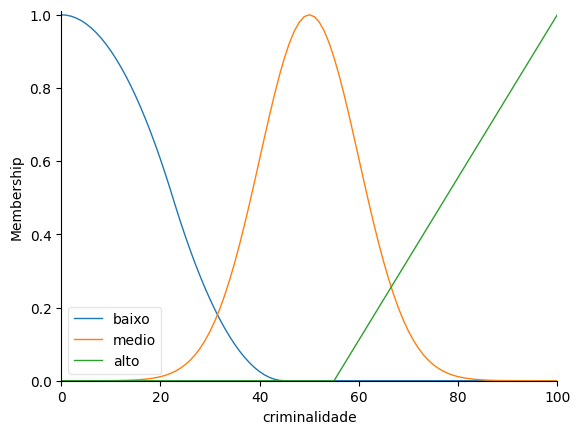

In [ ]:
crim = ctrl.Antecedent(np.arange(0, 101, 1), 'criminalidade')

crim['baixo'] = fuzz.zmf(crim.universe, 0, 45)
crim['medio'] = fuzz.gaussmf(crim.universe, 50, 10)
crim['alto'] = fuzz.trimf(crim.universe, [55, 100, 100])

crim.view()

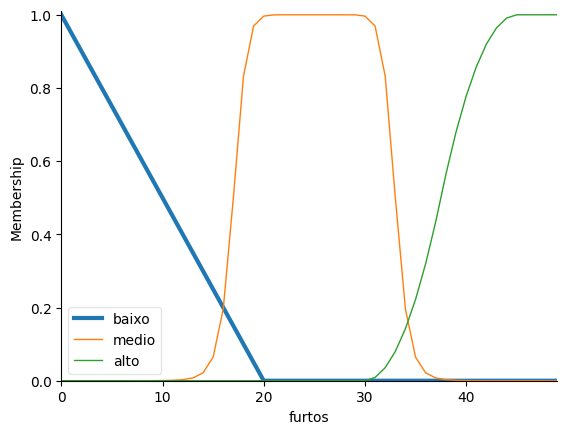

In [ ]:
fur['baixo'].view()

In [ ]:
regra = ctrl.Rule((rou['baixo'] & fur['baixo'] & hom['baixo']), crim['baixo'])
regra2 = ctrl.Rule((rou['medio'] | fur['medio']) & hom['baixo'], crim['medio'])
regra3 = ctrl.Rule((rou['alto'] | fur['alto']) | hom['alto'], crim['alto'])
regra4 = ctrl.Rule((t['alto'] | t['medio']) , crim['medio'])

# Cria um sistema de controle e uma simulator
crim_ctrl = ctrl.ControlSystem([regra, regra2, regra3, regra4])
crim_sim = ctrl.ControlSystemSimulation(crim_ctrl)

# Entrada
crim_sim.input['roubos'] = 10
crim_sim.input['furtos'] = 15
crim_sim.input['homicidios'] = 2
crim_sim.input['T'] = 20

# Calculate
crim_sim.compute()
crim_sim.output
crim.view(sim=crim_sim)

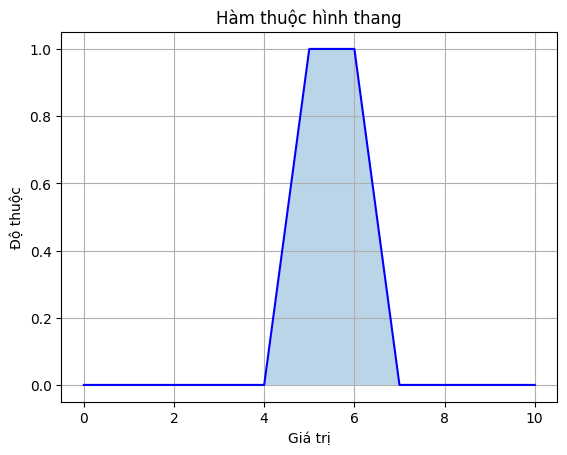

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Định nghĩa tập hợp và các giá trị
universe = np.arange(0, 11, 1)
a = 4
b = 5
c = 6
d = 7

# ĐÍnh giá tị hàm thuộc
membership = np.zeros_like(universe)
membership[(universe >= a) & (universe <= b)] = (universe[(universe >= a) & (universe <= b)] - a) / (b - a)
membership[(universe >= b) & (universe <= c)] = 1
membership[(universe >= c) & (universe <= d)] = (d - universe[(universe >= c) & (universe <= d)]) / (d - c)

# Vẽ đồ thị hàm thuộc hình thang
plt.plot(universe, membership, 'b', linewidth=1.5)
plt.fill_between(universe, 0, membership, alpha=0.3)
plt.title('Hàm thuộc hình thang')
plt.xlabel('Giá trị')
plt.ylabel('Độ thuộc')
plt.grid()
plt.show()